# Import Liberaries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
data.shape

(5572, 2)

# Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
print(data['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


In [9]:
# Count the frequency of top 5 messages.
data['Message'].value_counts().rename_axis(['Message']).reset_index(name='counts').head()

,Message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,Ok,4
4,Ok.,4


In [10]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
data.duplicated().sum()

415

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(5157, 2)

In [14]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4516   4516  Go until jurong point, crazy.. Available only ...   
spam         641    641  Free entry in 2 a wkly comp to win FA Cup fina...   

               
         freq  
Category       
ham         1  
spam        1

# Exploratory Data Analysis

<Axes: xlabel='Category', ylabel='count'>

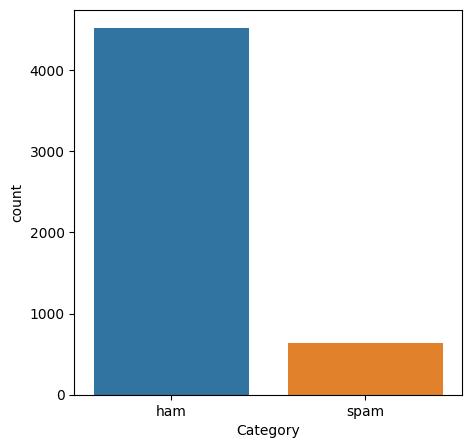

In [15]:
plt.figure(figsize=(5,5))

x= data.Category.value_counts()
sns.countplot(x= "Category",data= data)

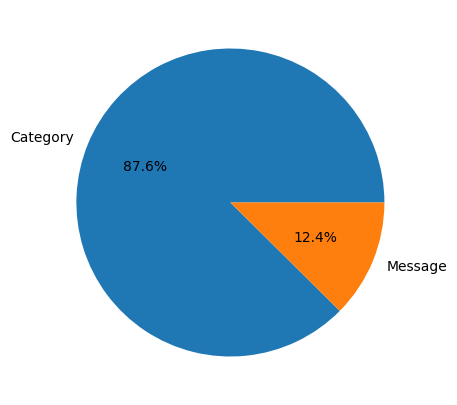

In [16]:
plt.figure(figsize=(5,5))

label= ["Category","Message"]

plt.pie(x.values, labels= label ,autopct= "%1.1f%%")
plt.show()   

In [17]:
import nltk
import re

In [18]:
data['num_characters'] = data['Message'].apply(len)

In [19]:
# num of words
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
data['num_sentences'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.390537,1.965290
std,58.382922,13.307527,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [23]:
# ham
data[data['Category'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.101417,1.822852
std,56.708301,13.488402,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [24]:
#spam
data[data['Category'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.472699,2.968799
std,30.399707,6.988134,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

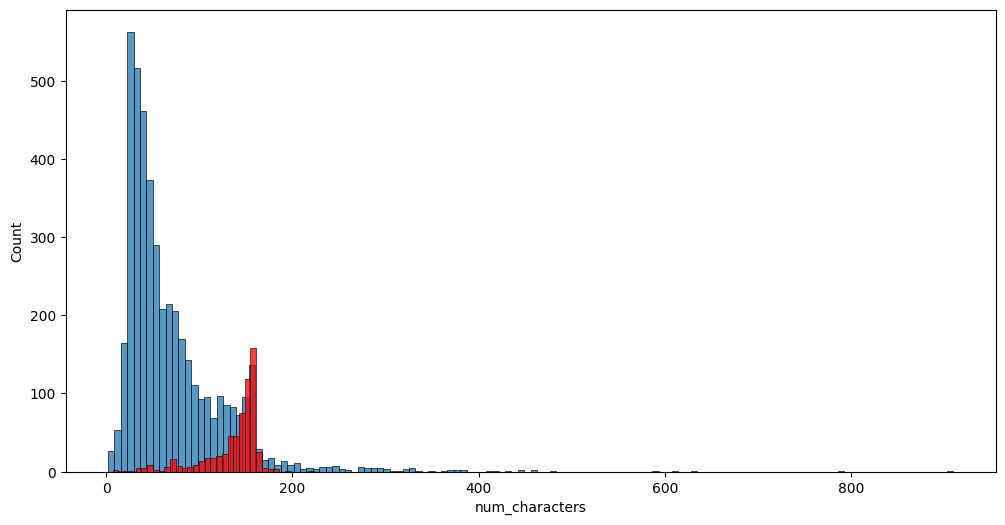

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category'] == 'ham']['num_characters'])
sns.histplot(data[data['Category'] == 'spam']['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

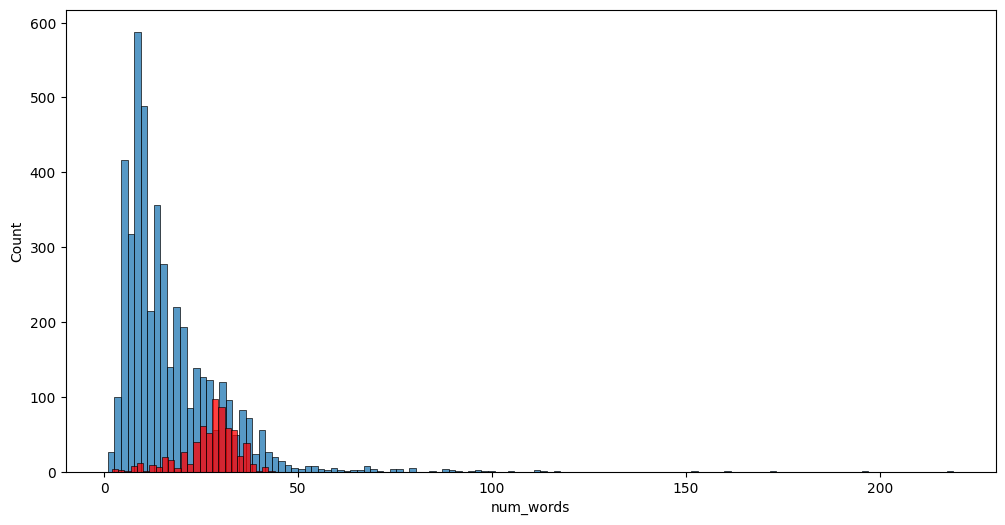

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category'] == 'ham']['num_words'])
sns.histplot(data[data['Category'] == 'spam']['num_words'],color='red')

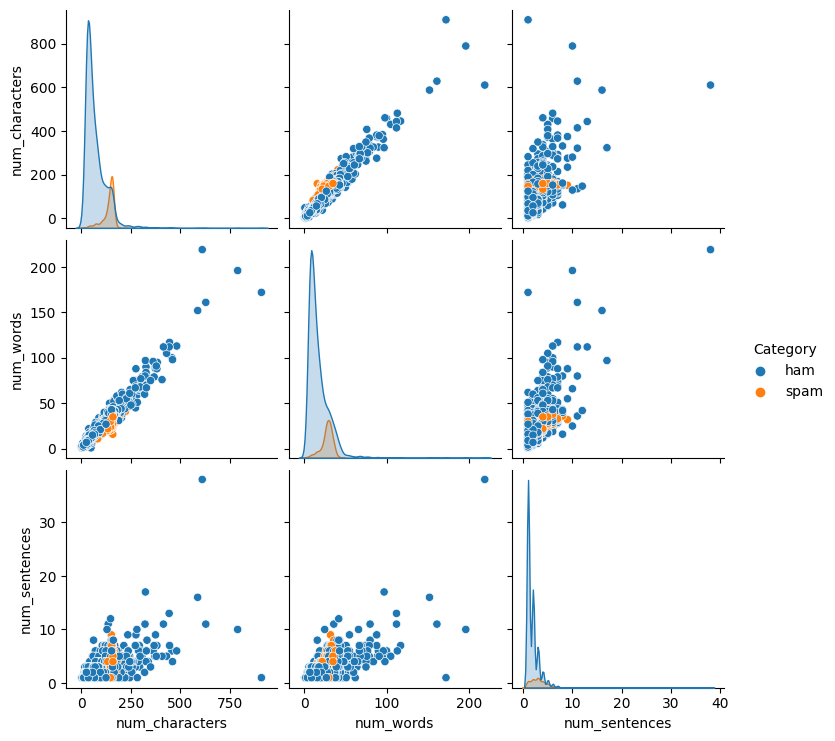

In [27]:
sns.pairplot(data,hue='Category')

## Word Cloud

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [29]:
# Get all the ham and spam emails
ham_msg = data[data.Category =='ham']
spam_msg = data[data.Category=='spam']

# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.Message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.Message.to_numpy().tolist())

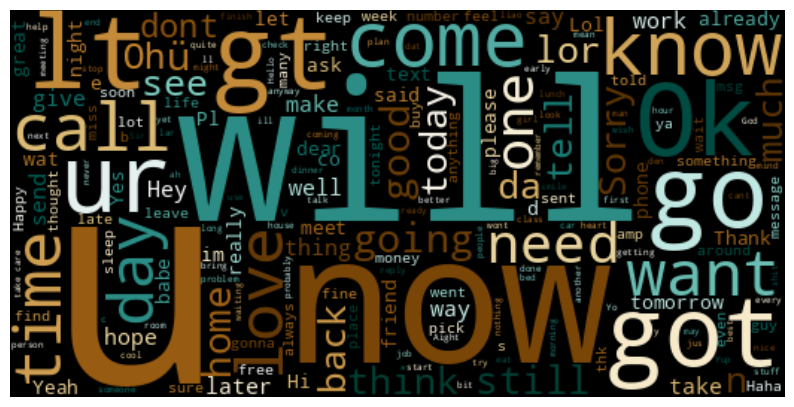

In [30]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260,stopwords=STOPWORDS, background_color ="black", colormap='BrBG_r').generate(ham_msg_text)
plt.figure(figsize=(10,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

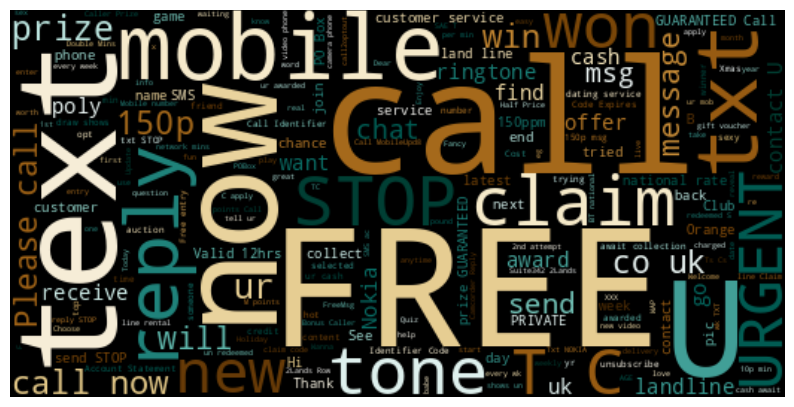

In [31]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS, background_color='black', colormap= 'BrBG').generate(spam_msg_text)
plt.figure(figsize=(10,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])

In [33]:
data.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


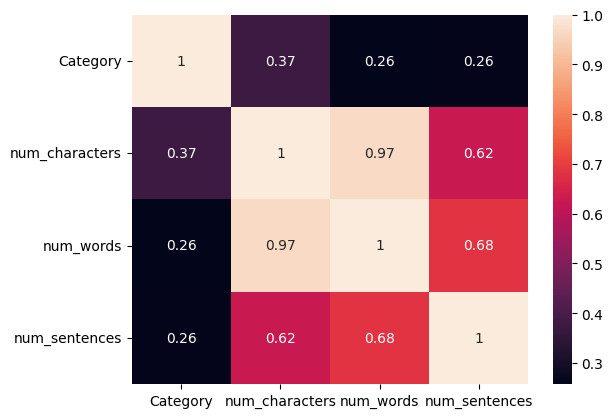

In [34]:
numeric_data = data.select_dtypes(include='number')

# Create a correlation matrix and plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

## Preprocessing the text data

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [36]:
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [37]:
# clean the messages
data['clean_text'] = data['Message'].apply(clean_text)
data.head()

,Category,Message,num_characters,num_words,num_sentences,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('joking')

'joke'

In [39]:
data['Message'][30]

"Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

In [40]:
clean_text("Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us")

'wait still clear sure sarcastic x want live us'

In [41]:
spam_corpus = []
for msg in data[data['Category'] == 1]['clean_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [42]:
len(spam_corpus)

11526

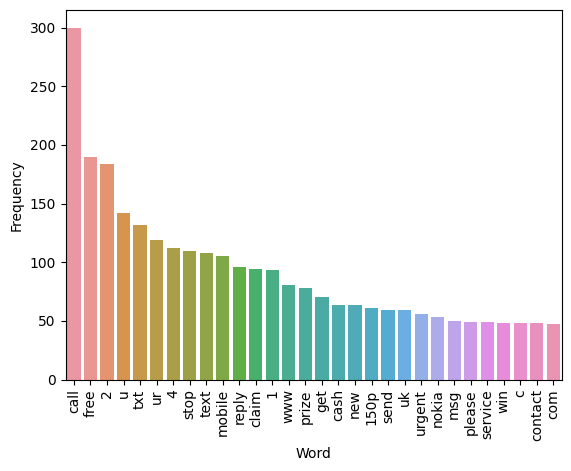

In [43]:
spam_counter = Counter(spam_corpus)
top_words = spam_counter.most_common(30)

# Create a DataFrame from the Counter data
df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus = []
for msg in data[data['Category'] == 0]['clean_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

36570

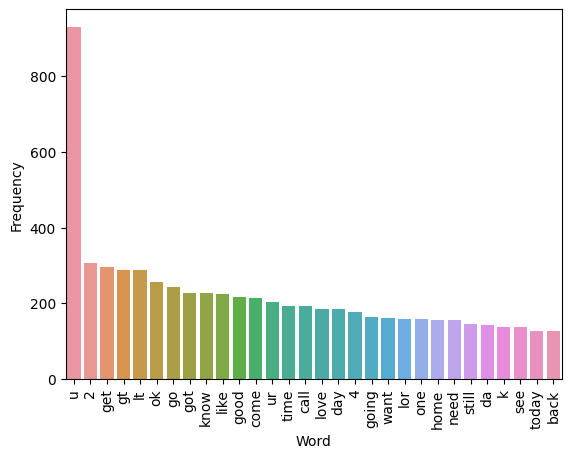

In [46]:
ham_counter = Counter(ham_corpus)
top_words = ham_counter.most_common(30)

# Create a DataFrame from the Counter data
df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Create a bar plot using Seaborn
sns.barplot(x='Word', y='Frequency', data=df)
plt.xticks(rotation='vertical')
plt.show()

# **Input Split**

 - Let us split the data for training

In [47]:
X = data['clean_text']
y = data['Category']

# Building Models

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
from sklearn.pipeline import Pipeline

In [49]:
# Initialize an empty list to store results
results_list = []

def classify(model, X, y,model_name, num_folds=5):
    # Use stratified k-fold cross-validation
    cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    # model training using cross-validation
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                               ('tfidf', TfidfTransformer()),
                               ('clf', model)])

    # Cross-validation scores
    cv_scores = cross_val_score(pipeline_model, X, y, cv=cv, scoring='accuracy')

    # Confusion matrix for the last fold
    last_fold = next(cv.split(X, y))
    x_train, x_test = X.iloc[last_fold[0]], X.iloc[last_fold[1]]
    y_train, y_test = y.iloc[last_fold[0]], y.iloc[last_fold[1]]

    # Fit the model to the training data
    pipeline_model.fit(x_train, y_train)

    # Predictions on the test set
    y_pred = pipeline_model.predict(x_test)
    
    # Calculate accuracy on the test set
    test_set_accuracy = accuracy_score(y_test, y_pred) * 100
    
    # Add results to the list
    results_list.append({"Model": model_name,
                         "Cross-Validation Accuracy": cv_scores.mean() * 100,
                         "Test Set Accuracy": test_set_accuracy,
                         "Precision": precision_score(y_test, y_pred)})

In [50]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
classify(lr_model, X, y,"Logistic Regression")

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
classify(dt_model,X,y,"Decision Tree Classifier")

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
classify(rf_model, X, y,"Random Forest Classifier")

In [53]:
from sklearn.svm import SVC
svc_model = SVC()
classify(svc_model, X, y,"SVC")

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
classify(nb_model, X, y,"MultinomialNB")

In [55]:
# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the final DataFrame
print("\nFinal Results:")
results_df


Final Results:


,Model,Cross-Validation Accuracy,Test Set Accuracy,Precision
0,Logistic Regression,96.102433,95.930233,0.947917
1,Decision Tree Classifier,93.562282,93.410853,0.941176
2,Random Forest Classifier,97.324078,97.674419,0.990566
3,SVC,97.770115,97.771318,0.964602
4,MultinomialNB,96.412736,96.511628,1.000000


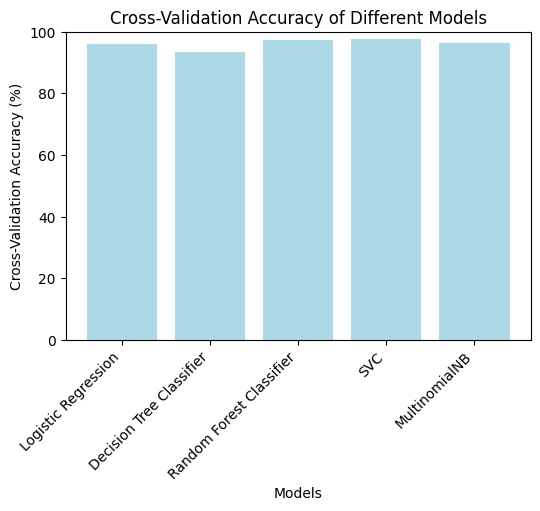

In [56]:
# Plot a bar chart for Cross-Validation Accuracy
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["Cross-Validation Accuracy"], color='lightblue')
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy (%)')
plt.title('Cross-Validation Accuracy of Different Models')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentage values
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

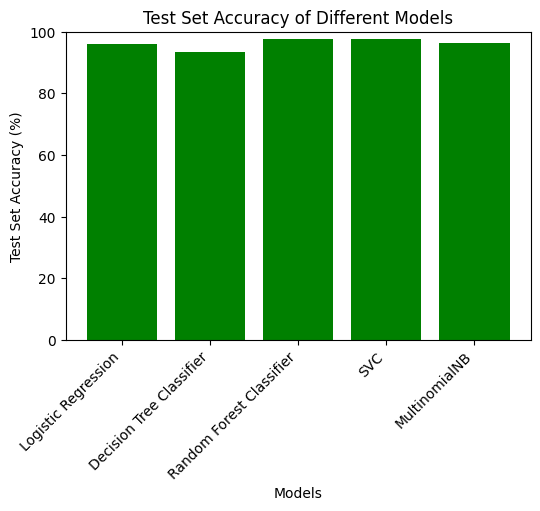

In [57]:
# Plot a bar chart for Test Set Accuracy
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["Test Set Accuracy"], color='green')
plt.xlabel('Models')
plt.ylabel('Test Set Accuracy (%)')
plt.title('Test Set Accuracy of Different Models')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentage values
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

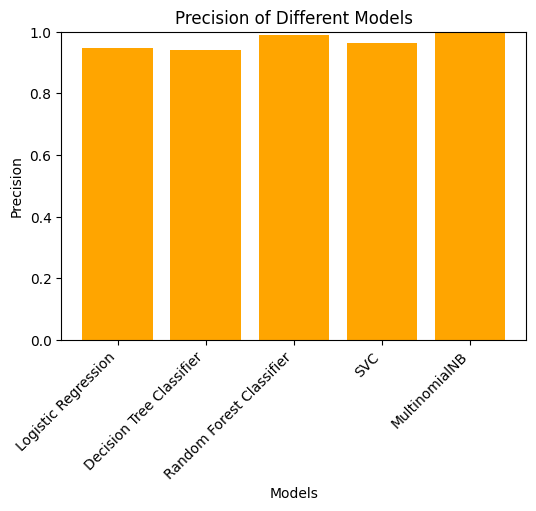

In [58]:
# Plot a bar chart for Precision
plt.figure(figsize=(6, 4))
plt.bar(results_df["Model"], results_df["Precision"], color='orange')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for precision values
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# Conclusion

- SVC gives the best accuracy with 97.77%.

- Pipeline is used to chain multiple estimators into one and automate the machine learning process. This is extremely useful as there are often a fixed sequence of steps in processing the data.